## Morphological Calls(63x) by Post Patch Outcomes

##### Date: 4/26/2018 Updated 63x.csv & shiny.csv

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

from IPython.display import display #Found this to display all columns in a table

sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')
#fsdf

##### postpatch_func.py by Rusty from Stash 

In [2]:
def nucleated(x):
    nuc_high_seal = x[(x['anno.postPatch_label'] == 'Nucleated') | 
                      (((x['anno.postPatch_label'] == 'nucleus_visible') | 
                      (x['anno.postPatch_label'] == 'nucleus_present')) & 
                      (x['anno.endPipetteR_label'] >= 500))]
    return nuc_high_seal

def partial_nucleated(y):
    nuc_low_seal = y[(y['anno.postPatch_label'] == 'Partial-Nucleus') | 
                     (((y['anno.postPatch_label'] == 'nucleus_present') | 
                     (y['anno.postPatch_label'] == 'nucleus_visible')) & 
                     (y["anno.endPipetteR_label"] <= 499))]
    return nuc_low_seal

def outside_out(z):
    no_high_seal = z[(z['anno.postPatch_label'] == 'Outside-Out') | 
                     (((z['anno.postPatch_label'] == 'nucleus_absent') | 
                     (z['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                     (z['anno.endPipetteR_label'] >= 500))]
    return no_high_seal

def no_seal(w): 
    no_low_seal = w[(w['anno.postPatch_label'] == 'No-Seal') | 
                    (((w['anno.postPatch_label'] == 'nucleus_absent') | 
                    (w['anno.postPatch_label'] == 'no_nucleus_visible')) & 
                    (w['anno.endPipetteR_label'] <= 499))]
    return no_low_seal
    
def entire_cell(v):
    entire = v[(v['anno.postPatch_label'] == 'Entire-Cell') | 
               (v['anno.postPatch_label'] == 'entire_cell')]
    return entire

#variable['post_patch'] = 'Term'
#Term is an output displayed in the Post_Patch column

def reclassify(df):
    nu = nucleated(df)
    nu['post_patch'] = 'Nuc-high seal' 
    oo = outside_out(df)
    oo['post_patch'] = 'No-high seal'
    pn = partial_nucleated(df)
    pn['post_patch'] = 'Nuc-low seal'
    ns = no_seal(df)
    ns['post_patch'] = 'No-low seal'
    ec = entire_cell(df)
    ec['post_patch'] = 'Entire cell'
    return  nu, oo, pn, ns, ec

def concat_df(a, b, c, d, e):
    frames = (a, b, c, d, e)
    df = pd.concat(frames)
    return df

def postpatch_reclass(df):
    return concat_df(*reclassify(df))

#final_df = postpatch_reclass(final_df)

##### Reads 63x.csv & shiny.csv

In [3]:
morph_df = pd.read_csv("63x.csv")
shiny_df = pd.read_csv("shiny.csv")

##### Creating shiny_df from shiny.csv

In [4]:
shiny_initial = ['anno.sample_id',
                 'anno.postPatch_label',
                 'anno.endPipetteR_label']
shiny_df = shiny_df[shiny_initial]
shiny_df.head()

,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P1S4_160318_069_A01,O/O,0.0
1,P1S4_160407_108_A01,nucleated patch,0.0
2,P1S4_160407_109_A01,partial nucleus,0.0
3,P1S4_160407_112_A01,o/o,0.0
4,P1S4_160407_113_A01,0,0.0


##### Creating morph_df from 63x.csv

In [5]:
morph_initial = ['patched_cell_container',
                 'ims63x_go_no_go',
                 'project']
morph_df = morph_df[morph_initial]
morph_df.tail()

,patched_cell_container,ims63x_go_no_go,project
6461,P2S4_180109_052_A01,NaN,mIVSCC-MET
6462,PAS4_180109_452_A01,NaN,mIVSCC-MET
6463,P8S4_180110_353_A01,NaN,mIVSCC-MET
6464,P8S4_180110_354_A01,63x no go,mIVSCC-MET
6465,PAS4_180110_454_A01,NaN,mIVSCC-MET


##### Merging morph_df with shiny_lims_df to create final_df

In [6]:
#Inner merge = contains only matching data of both morph_df and shiny_df

final_df = pd.merge(left = morph_df, 
                    right = shiny_df, 
                    left_on = 'patched_cell_container', 
                    right_on = 'anno.sample_id', 
                    how = 'inner')

In [7]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
0,P8S4_180103_351_A01,NaN,mIVSCC-MET,P8S4_180103_351_A01,nucleus_absent,35.0
1,P8S4_180103_352_A01,63x no go,mIVSCC-MET,P8S4_180103_352_A01,nucleus_present,8.5
2,P1S4_160517_001_A01,NaN,T301x,P1S4_160517_001_A01,Partial nucleus,0.0
3,P1S4_160517_003_A01,NaN,T301x,P1S4_160517_003_A01,o/o,0.0
4,P1S4_160517_004_A01,NaN,T301x,P1S4_160517_004_A01,o/o,0.0


##### Info

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2961 entries, 0 to 2960
Data columns (total 6 columns):
patched_cell_container    2961 non-null object
ims63x_go_no_go           1631 non-null object
project                   2961 non-null object
anno.sample_id            2961 non-null object
anno.postPatch_label      2953 non-null object
anno.endPipetteR_label    2961 non-null float64
dtypes: float64(1), object(5)
memory usage: 161.9+ KB


##### Creating Date column using patched_cell_container column

In [9]:
final_df['Date'] = final_df['patched_cell_container'].str[5:11]

##### Indexing Date column then sorting by date index

In [10]:
final_df = final_df.set_index('Date')

In [11]:
final_df.sort_index(inplace = True)

In [12]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
160510,P1S4_160510_455_A01,NaN,T301x,P1S4_160510_455_A01,0,0.0
160511,P1S4_160511_471_A01,NaN,T301x,P1S4_160511_471_A01,0,0.0
160511,P1S4_160511_472_A01,NaN,T301x,P1S4_160511_472_A01,Partial nucleus,0.0
160511,P1S4_160511_473_A01,NaN,T301x,P1S4_160511_473_A01,0,0.0
160512,P1S4_160512_485_A01,NaN,T301x,P1S4_160512_485_A01,o/o,0.0


In [13]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
180319,P8S4_180319_355_A01,NaN,mIVSCC-MET,P8S4_180319_355_A01,nucleus_present,1500.0
180319,P9S4_180319_403_A01,NaN,mIVSCC-MET,P9S4_180319_403_A01,nucleus_present,2000.0
180319,P9S4_180319_404_A01,NaN,mIVSCC-MET,P9S4_180319_404_A01,nucleus_present,5.0
180319,PBS4_180319_503_A01,NaN,mIVSCC-MET,PBS4_180319_503_A01,nucleus_absent,0.0
180319,PBS4_180319_505_A01,NaN,mIVSCC-MET,PBS4_180319_505_A01,nucleus_absent,5.0


##### final_df start at production date to present date

In [14]:
final_df = final_df['170901':]

In [15]:
final_df.head()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
170901,P8S4_170901_354_A01,63x no go,T301x,P8S4_170901_354_A01,No-Seal,0.0
170901,P8S4_170901_352_A01,63x no go,T301x,P8S4_170901_352_A01,Nucleated,0.0
170901,P8S4_170901_351_A01,63x no go,T301x,P8S4_170901_351_A01,No-Seal,0.0
170901,P2S4_170901_054_A01,63x go,T301x,P2S4_170901_054_A01,Partial-Nucleus,0.0
170901,P2S4_170901_053_A01,NaN,T301x,P2S4_170901_053_A01,Nucleated,0.0


In [16]:
final_df.tail()

,patched_cell_container,ims63x_go_no_go,project,anno.sample_id,anno.postPatch_label,anno.endPipetteR_label
Date,,,,,,
180319,P8S4_180319_355_A01,NaN,mIVSCC-MET,P8S4_180319_355_A01,nucleus_present,1500.0
180319,P9S4_180319_403_A01,NaN,mIVSCC-MET,P9S4_180319_403_A01,nucleus_present,2000.0
180319,P9S4_180319_404_A01,NaN,mIVSCC-MET,P9S4_180319_404_A01,nucleus_present,5.0
180319,PBS4_180319_503_A01,NaN,mIVSCC-MET,PBS4_180319_503_A01,nucleus_absent,0.0
180319,PBS4_180319_505_A01,NaN,mIVSCC-MET,PBS4_180319_505_A01,nucleus_absent,5.0


##### Renaming Columns

In [17]:
#Duration columns are in seconds
final_df.rename(columns = {'ims63x_go_no_go' : 'morph'}, inplace = True)

##### Adding post_patch column to the end of final_df

In [18]:
final_df = postpatch_reclass(final_df)

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

##### Dropping columns 

In [19]:
final_df.drop(['patched_cell_container', 'project', 'anno.sample_id', 'anno.endPipetteR_label'], axis=1, inplace=True)

##### Filters columns that have NaN

In [20]:
final_df.dropna(subset = ['morph'], inplace = True)

In [21]:
#Categorical
final_df['morph'] = final_df['morph'].astype('category')
final_df['post_patch'] = final_df['post_patch'].astype('category')

#Numerical
#final_df['anno.endPipetteR_label'] = final_df['anno.endPipetteR_label'].astype('float')

##### Date Range for final_df

In [22]:
final_df.sort_index(inplace = True)

In [23]:
final_df.head()

,morph,anno.postPatch_label,post_patch
Date,,,
170901,63x no go,Nucleated,Nuc-high seal
170901,63x go,No-Seal,No-low seal
170901,63x go,Partial-Nucleus,Nuc-low seal
170901,63x no go,No-Seal,No-low seal
170901,63x no go,No-Seal,No-low seal


In [24]:
final_df.tail()

,morph,anno.postPatch_label,post_patch
Date,,,
180305,63x no go,nucleus_present,Nuc-low seal
180306,63x go,nucleus_present,Nuc-high seal
180306,63x no go,nucleus_present,Nuc-high seal
180306,63x go,nucleus_present,Nuc-high seal
180306,63x no go,nucleus_present,Nuc-low seal


##### Info

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 170901 to 180306
Data columns (total 3 columns):
morph                   995 non-null category
anno.postPatch_label    995 non-null object
post_patch              995 non-null category
dtypes: category(2), object(1)
memory usage: 17.8+ KB


### Creating pivot table 

In [26]:
final_df1 = final_df[['post_patch', 'morph', 'anno.postPatch_label']]
final_df1.head()

,post_patch,morph,anno.postPatch_label
Date,,,
170901,Nuc-high seal,63x no go,Nucleated
170901,No-low seal,63x go,No-Seal
170901,Nuc-low seal,63x go,Partial-Nucleus
170901,No-low seal,63x no go,No-Seal
170901,No-low seal,63x no go,No-Seal


In [27]:
final_df1 = final_df.groupby(['post_patch', 'morph']).count()

In [28]:
final_df1

anno.postPatch_label
post_patch    morph                          
Entire cell   63x go                        5
              63x no go                    10
No-high seal  63x go                       20
              63x no go                    12
No-low seal   63x go                       19
              63x no go                   143
Nuc-high seal 63x go                      447
              63x no go                   196
Nuc-low seal  63x go                       49
              63x no go                    94

In [29]:
final_df1 = final_df1.rename(columns = {'anno.postPatch_label' : ''})

In [30]:
final_df1

post_patch    morph         
Entire cell   63x go       5
              63x no go   10
No-high seal  63x go      20
              63x no go   12
No-low seal   63x go      19
              63x no go  143
Nuc-high seal 63x go     447
              63x no go  196
Nuc-low seal  63x go      49
              63x no go   94

In [31]:
final_df1.reset_index(inplace = True)

In [32]:
final_df1

,post_patch,morph,
0,Entire cell,63x go,5
1,Entire cell,63x no go,10
2,No-high seal,63x go,20
3,No-high seal,63x no go,12
4,No-low seal,63x go,19
5,No-low seal,63x no go,143
6,Nuc-high seal,63x go,447
7,Nuc-high seal,63x no go,196
8,Nuc-low seal,63x go,49
9,Nuc-low seal,63x no go,94


In [33]:
final_df1 = final_df1.pivot_table(values=[''], 
                                  index=['post_patch'], 
                                  columns = ['morph'], 
                                  aggfunc='sum')

In [34]:
final_df1

morph         63x go 63x no go
post_patch                    
Entire cell        5        10
No-high seal      20        12
No-low seal       19       143
Nuc-high seal    447       196
Nuc-low seal      49        94

##### Adding total counts 

In [35]:
#Rusty's Method figure it out later
post_patch_totals = list(final_df1.sum(1))
post_patch_totals = [int(x) for x in post_patch_totals]

##### Aaron's method for Plot: Morphological Calls(63x) by Post Patch Outcomes

Text(0.5,1,u'Count of Morphological Calls by Post Patch Outcomes')

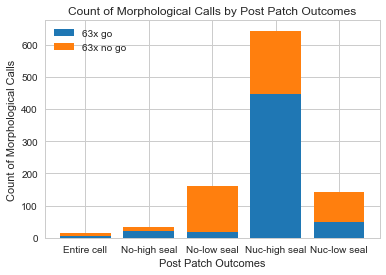

In [36]:
x = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal', 'Entire cell']
morph = ['63x go', '63x no go']
#color = ["r", "g"]

bottom = np.zeros(len(x))
y = np.zeros(len(x))
for mp in morph:
    bottom = bottom + y
    y = [len(final_df[(final_df['post_patch'] == f) & (final_df['morph'] == mp)]) for f in x]
    plt.bar(x, y, bottom = bottom, label = mp)
    
plt.xlabel('Post Patch Outcomes')
plt.ylabel('Count of Morphological Calls')
plt.legend()
plt.title('Count of Morphological Calls by Post Patch Outcomes')
#plt.savefig("count_patch_duration_vs_morph")

##### Same Plot as Aaron's Method

[Text(0,0.5,u'Count'), Text(0.5,0,u'Post Patch Outcomes')]

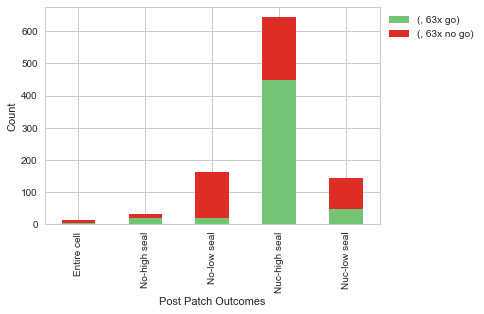

In [37]:
my_colors = ['#74c476', '#de2d26']
bp = final_df1.plot.bar(stacked=True, color = my_colors)

bp.legend(loc = 0, bbox_to_anchor=(1, 1))
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Count')

##### Vertical Bar Plot

##### Changed final_df1 from ratios to percentages 

In [38]:
final_df1 = final_df1.div(final_df1.sum(1), axis=0) * 100

In [39]:
final_df1

morph             63x go  63x no go
post_patch                         
Entire cell    33.333333  66.666667
No-high seal   62.500000  37.500000
No-low seal    11.728395  88.271605
Nuc-high seal  69.517885  30.482115
Nuc-low seal   34.265734  65.734266

### Stacked Percentage Bar Plot: Morphological Calls(63x) by Post Patch Outcomes

### Vertical Bar Plot with Percentages

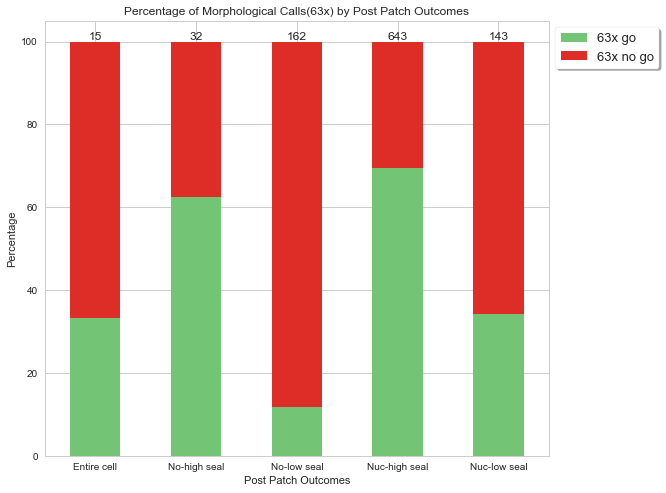

In [40]:
#order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal', 'Entire cell']
#.loc[order] lets you choose the order

my_colors = ['#74c476', '#de2d26']
bp = final_df1.plot.bar(stacked = True, 
                        color = my_colors, 
                        figsize= (10,8),
                        rot = 0)

bp.legend(['63x go', '63x no go'],
          loc = 0, 
          bbox_to_anchor = (1, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 13)

plt.subplots_adjust(left = 0.1, right = 0.8, bottom = None, top = None, wspace=None, hspace=None)
#This helps if axis labels are getting cutoff when saving final image

#Rusty's Method figure it out later
rects = bp.patches
labels = post_patch_totals

#Rusty's Method figure it out later
for rect, label in zip (rects, labels):
    height = 100
    x_value = rect.get_x() + rect.get_width() / 2
    bp.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', size = 12)

bp.set_title('Percentage of Morphological Calls(63x) by Post Patch Outcomes')
bp.set(xlabel = 'Post Patch Outcomes', ylabel = 'Percentage')
plt.savefig('Stacked_Percentage_Barplot_M_by_PP')

##### Horizontal Bar Plot with Percentages

[Text(0,0.5,u'Post Patch Outcomes'), Text(0.5,0,u'Percentage')]

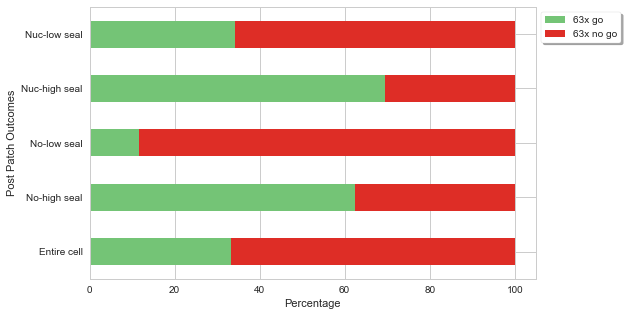

In [41]:
my_colors = ['#74c476', '#de2d26']
bp = final_df1.plot(kind = 'barh', 
                    stacked = True, 
                    color = my_colors,
                    figsize= (8,5))

bp.legend(['63x go', '63x no go'],
          loc = 0, 
          bbox_to_anchor = (1, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 10)

bp.set(xlabel = 'Percentage', ylabel = 'Post Patch Outcomes')

### Trial plot to order post patch outcomes

In [42]:
#TRY to order the post patch outcomes for .plot.bar(stacked = True)

[Text(0,0.5,u'Post Patch Outcomes'), Text(0.5,0,u'Percentage')]

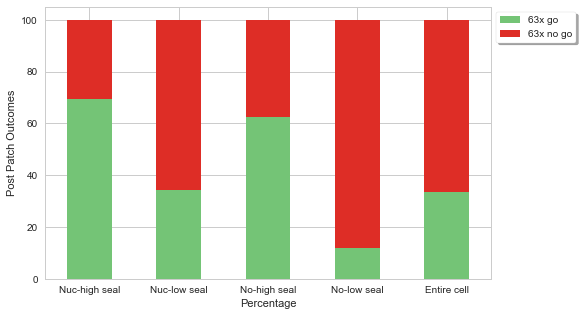

In [43]:
order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal', 'Entire cell']
#.loc[order] lets you choose the order

my_colors = ['#74c476', '#de2d26']
bp = final_df1.loc[order].plot.bar(stacked = True, 
                    color = my_colors,
                    figsize= (8,5),
                    rot = 0)

bp.legend(['63x go', '63x no go'],
          loc = 0, 
          bbox_to_anchor = (1, 1), 
          frameon = True, 
          shadow = True,
          fontsize = 10)

bp.set(xlabel = 'Percentage', ylabel = 'Post Patch Outcomes')